# HIVE
HIVE is a project which is focused on recommending fertilizers to users based on plant disease images. This notebook comes under the ML part feature where the rest will be present in the Flask site

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from kaggle_datasets import KaggleDatasets
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Download dataset

Install gdown library using pip

In [2]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=eaab92b0e20c0961a564069e41613190b15a197f2a1df899ae07c79ad6080d16
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown


### Download dataset from Google Drive

In [3]:
!gdown --id 1fxs7ptI6zh7NTbCOZARKZ7AmYKjnprrY

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fxs7ptI6zh7NTbCOZARKZ7AmYKjnprrY
To: /kaggle/working/Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip
100%|█████████████████████████████████████████| 337M/337M [00:01<00:00, 229MB/s]


### Image preprocessing

First let's see details present in an image from dataset

In [4]:
image = cv2.imread("../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
image

array([[[196, 163, 167],
        [195, 162, 166],
        [194, 161, 165],
        ...,
        [211, 182, 185],
        [209, 180, 183],
        [207, 178, 181]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [212, 183, 186],
        [210, 181, 184],
        [209, 180, 183]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [214, 185, 188],
        [212, 183, 186],
        [211, 182, 185]],

       ...,

       [[124,  90, 100],
        [126,  92, 102],
        [128,  94, 104],
        ...,
        [137, 110, 126],
        [137, 110, 126],
        [137, 110, 126]],

       [[125,  91, 101],
        [126,  92, 102],
        [127,  93, 103],
        ...,
        [133, 106, 122],
        [134, 107, 123],
        [134, 107, 123]],

       [[128,  94, 104],
        [127,  93, 103],
        [126,  92, 102],
        ...,
        [132, 105, 121],
        [133, 106, 122],
        [134, 107, 123]]

We'll use ImageDataGenerator from keras library for Image Preprocessing

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size =(256, 256),  
                  batch_size = 32,
                  class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size =(256, 256),
                    batch_size = 32,
                    class_mode="categorical",
                    shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


From the above info, it's clear that there are 38 different categories in the dataset (crop varieties - both healthy and diseased)

# Model in TF.Keras

Now let's create a CNN model for classifying the image data

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
def cnn1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense((38), activation='softmax'))
    model.compile(optimizer='adam', metrics='Accuracy', loss='categorical_crossentropy')
    return model

In [39]:
model_1=cnn1()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 256)      

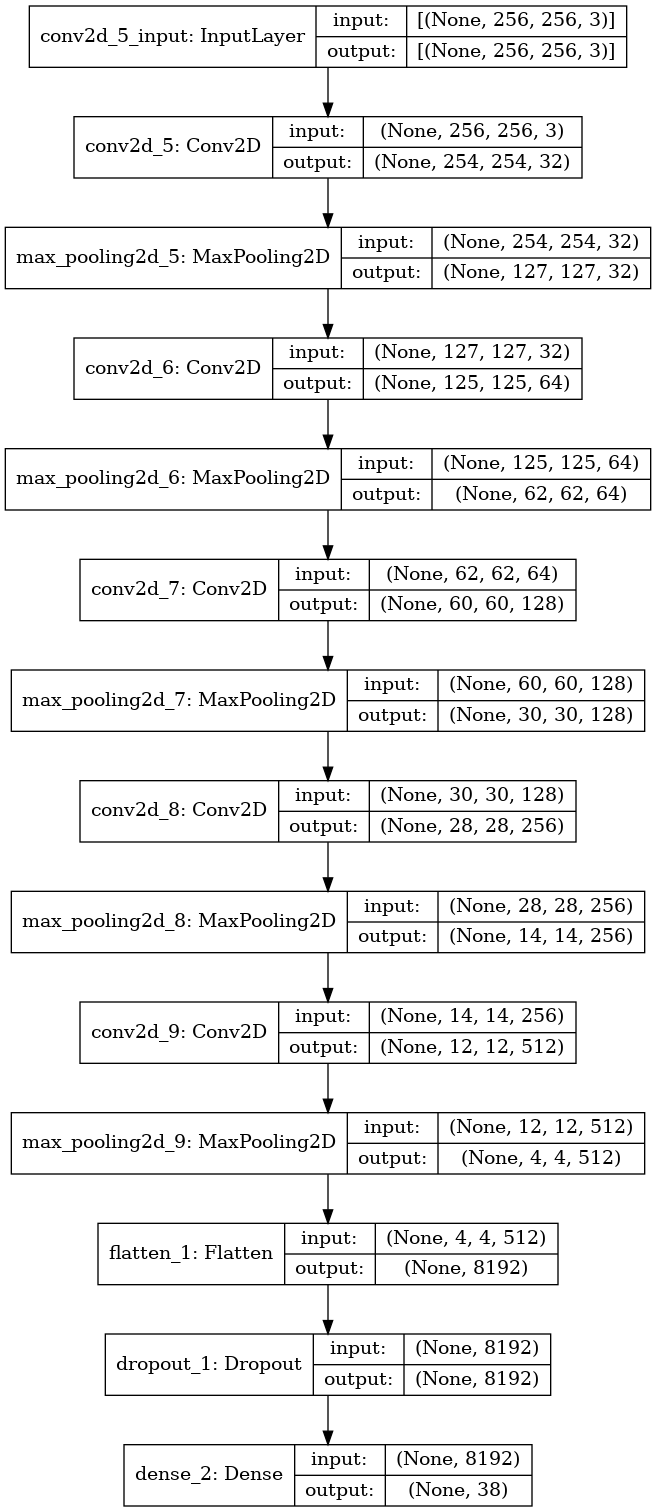

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [42]:
m1_res = model_1.fit(train_generator,
             epochs = 5,
             validation_data = test_generator)

Epoch 1/5
2197/2197 [==============================] - 304s 138ms/step - loss: 0.5967 - Accuracy: 0.8121 - val_loss: 0.2781 - val_Accuracy: 0.9126
Epoch 2/5
2197/2197 [==============================] - 302s 138ms/step - loss: 0.2992 - Accuracy: 0.9019 - val_loss: 0.2228 - val_Accuracy: 0.9288
Epoch 3/5
2197/2197 [==============================] - 324s 148ms/step - loss: 0.2108 - Accuracy: 0.9312 - val_loss: 0.1967 - val_Accuracy: 0.9361
Epoch 4/5
2197/2197 [==============================] - 310s 141ms/step - loss: 0.1660 - Accuracy: 0.9448 - val_loss: 0.1878 - val_Accuracy: 0.9416
Epoch 5/5
2197/2197 [==============================] - 306s 139ms/step - loss: 0.1396 - Accuracy: 0.9549 - val_loss: 0.1194 - val_Accuracy: 0.9637


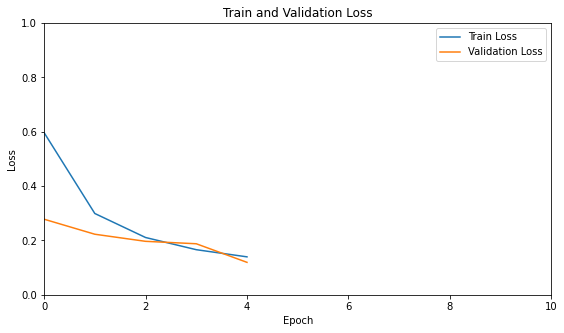

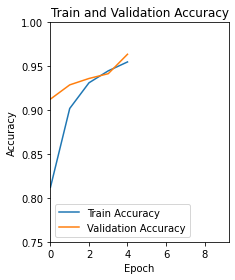

In [43]:
# Viewing metrics
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(m1_res.history['loss'],label="Train Loss")
plt.plot(m1_res.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(m1_res.history['Accuracy'], label="Train Accuracy")
plt.plot(m1_res.history['val_Accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()
plt.show()

# Save and reload model

In [44]:
m1_saved = model_1.save("./m1_saved")
m1_h5 = model_1.save("./m1_hdf5.h5")

In [45]:
m1_recontr = tf.keras.models.load_model("./m1_hdf5.h5")

In [46]:
m1_recontr.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 256)      

In [47]:
categories = list(train_generator.class_indices.keys())
print(train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [48]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_generator.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/kaggle/working/class_indices.json

[[4.5118929e-15 7.7254609e-13 1.1836416e-18 1.6821737e-16 3.2409898e-13
  2.7944821e-25 4.9344135e-20 6.1421312e-18 9.9996483e-01 5.1069651e-18
  1.9160747e-16 1.4708906e-21 6.4379234e-20 1.8833062e-23 1.1422310e-30
  4.3060725e-20 1.0617008e-20 9.1410473e-12 3.0884472e-13 6.3631341e-21
  4.3184406e-21 1.2901178e-22 1.6199872e-28 1.1443517e-28 1.9988723e-32
  6.4415386e-26 1.2212965e-21 1.0384256e-26 6.1902443e-22 6.2996344e-11
  3.5152680e-05 2.1403638e-19 1.5008486e-17 2.7943259e-30 5.6571888e-25
  3.8205495e-26 6.1425043e-26 4.0695715e-21]]


8

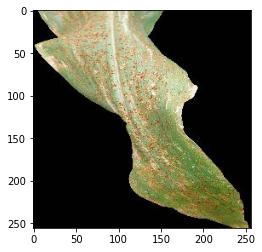

In [78]:
im1 = "../input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG"
dat = tf.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tf.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]

In [75]:
yt = train_generator.class_indices
yt

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [76]:
classes=['Apple_scab', 'Apple_Black_rot', 'Cedar_apple_rust', 
         'Apple_healthy', 'Blueberry_healthy', 
         'Cherry_Powdery_mildew', 'Cherry_healthy', 
         'Corn_Cercospora_leaf_spot', 'Corn_Common_rust_', 
         'Corn_Northern_Leaf_Blight', 'Corn_healthy', 
         'Grape_Black_rot', 'Grape_Black_Measles', 
         'Grape_Leaf_blight', 'Grape_healthy', 
         'Orange_Haunglongbing', 'Peach_Bacterial_spot', 
         'Peach_healthy', 'Pepper,_bell_Bacterial_spot', 'Pepper,_bell_healthy', 
         'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 
         'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 
         'Strawberry_Leaf_scorch', 'Strawberry_healthy', 'Tomato_Bacterial_spot', 
         'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 
         'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 
         'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 
         'Tomato_Tomato_mosaic_virus', 'Tomato_healthy']

In [77]:
print(classes[y_class[0]])

Potato_healthy


[[1.5137662e-12 9.4915498e-10 6.6996143e-13 6.8650381e-12 4.7120276e-11
  8.3005298e-17 3.3038462e-13 1.5460638e-10 9.9976999e-01 5.0401012e-16
  1.8631337e-15 5.9525999e-14 6.7788640e-15 1.1010969e-18 8.3179150e-21
  1.5070056e-15 4.6163363e-14 5.6803007e-11 1.5332967e-08 2.3887286e-14
  2.9495989e-12 1.3105134e-15 1.1539541e-16 8.6681475e-23 1.6532388e-18
  1.4810488e-19 1.3248526e-17 1.3876267e-20 2.5621034e-16 1.7922919e-07
  2.2982813e-04 1.4070830e-12 5.3169472e-11 3.4394664e-22 1.8932681e-15
  1.1242248e-17 2.5671268e-20 2.1144563e-14]]
Corn_Common_rust_


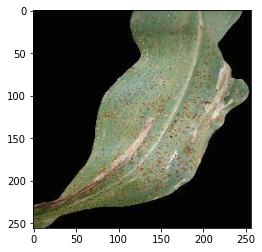

In [82]:
im1 = "../input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG"
dat = tf.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tf.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]
print(classes[y_class[0]])